In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,7957,North East,Assam,Rural,Guwhati,Personal,Household,AC,0,1,...,0,0,0,4474.0,12,202,Manufacturer,30.0,Claim,0
1,1396,East,Delhi,Urban,New Delhi,Personal,Entertainment,TV,0,0,...,1,1,1,25000.0,13,60,Dealer,1.3,Complaint,0
2,7582,West,Andhra Pradesh,Rural,Hyderabad,Business,Household,AC,0,0,...,0,0,0,10000.0,12,3,Dealer,2.5,Claim,0
3,5824,West,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,0,0,...,1,1,0,4216.0,10,672,Dealer,25.0,Other,0
4,4086,South West,Kerala,Rural,Kochi,Business,Household,AC,0,0,...,0,0,0,20000.0,13,3,Manufacturer,6.5,Claim,0


NOTE: '0' means to replace the component, '1' means partial damage of the component and with servicing component good work and '2' no issue with the component. This is for all the columns coded with '0','1','2'

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8341 non-null   int64  
 1   Region            8341 non-null   object 
 2   State             8341 non-null   object 
 3   Area              8341 non-null   object 
 4   City              8341 non-null   object 
 5   Consumer_profile  8341 non-null   object 
 6   Product_category  8341 non-null   object 
 7   Product_type      8341 non-null   object 
 8   AC_1001_Issue     8341 non-null   int64  
 9   AC_1002_Issue     8341 non-null   int64  
 10  AC_1003_Issue     8341 non-null   int64  
 11  TV_2001_Issue     8341 non-null   int64  
 12  TV_2002_Issue     8341 non-null   int64  
 13  TV_2003_Issue     8341 non-null   int64  
 14  Claim_Value       8101 non-null   float64
 15  Service_Centre    8341 non-null   int64  
 16  Product_Age       8341 non-null   int64  


In [3]:
df.isnull().sum()

Unnamed: 0            0
Region                0
State                 0
Area                  0
City                  0
Consumer_profile      0
Product_category      0
Product_type          0
AC_1001_Issue         0
AC_1002_Issue         0
AC_1003_Issue         0
TV_2001_Issue         0
TV_2002_Issue         0
TV_2003_Issue         0
Claim_Value         240
Service_Centre        0
Product_Age           0
Purchased_from        0
Call_details          0
Purpose               0
Fraud                 0
dtype: int64

In [4]:
df.rename(columns={'Unnamed: 0': 'Customer_id'}, inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_id       8341 non-null   int64  
 1   Region            8341 non-null   object 
 2   State             8341 non-null   object 
 3   Area              8341 non-null   object 
 4   City              8341 non-null   object 
 5   Consumer_profile  8341 non-null   object 
 6   Product_category  8341 non-null   object 
 7   Product_type      8341 non-null   object 
 8   AC_1001_Issue     8341 non-null   int64  
 9   AC_1002_Issue     8341 non-null   int64  
 10  AC_1003_Issue     8341 non-null   int64  
 11  TV_2001_Issue     8341 non-null   int64  
 12  TV_2002_Issue     8341 non-null   int64  
 13  TV_2003_Issue     8341 non-null   int64  
 14  Claim_Value       8101 non-null   float64
 15  Service_Centre    8341 non-null   int64  
 16  Product_Age       8341 non-null   int64  


## DATA CLEANING

In [6]:
# Handeling missing values 
df.isnull().sum()

Customer_id           0
Region                0
State                 0
Area                  0
City                  0
Consumer_profile      0
Product_category      0
Product_type          0
AC_1001_Issue         0
AC_1002_Issue         0
AC_1003_Issue         0
TV_2001_Issue         0
TV_2002_Issue         0
TV_2003_Issue         0
Claim_Value         240
Service_Centre        0
Product_Age           0
Purchased_from        0
Call_details          0
Purpose               0
Fraud                 0
dtype: int64

In [7]:
#Claim_Value         240  
# Fill missing Claim_Value with mean or median
df['Claim_Value'] = df['Claim_Value'].fillna(df['Claim_Value'].median())


In [8]:
df['Region'].value_counts()

Region
South         1827
North East    1241
South East    1144
West          1132
East           816
North          782
South West     748
North West     651
Name: count, dtype: int64

/var/folders/x6/927q59w17dg3mzfmhv4v0g6r0000gn/T/ipykernel_2412/388537064.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=region_counts.index, x=region_counts.values, palette=colors)


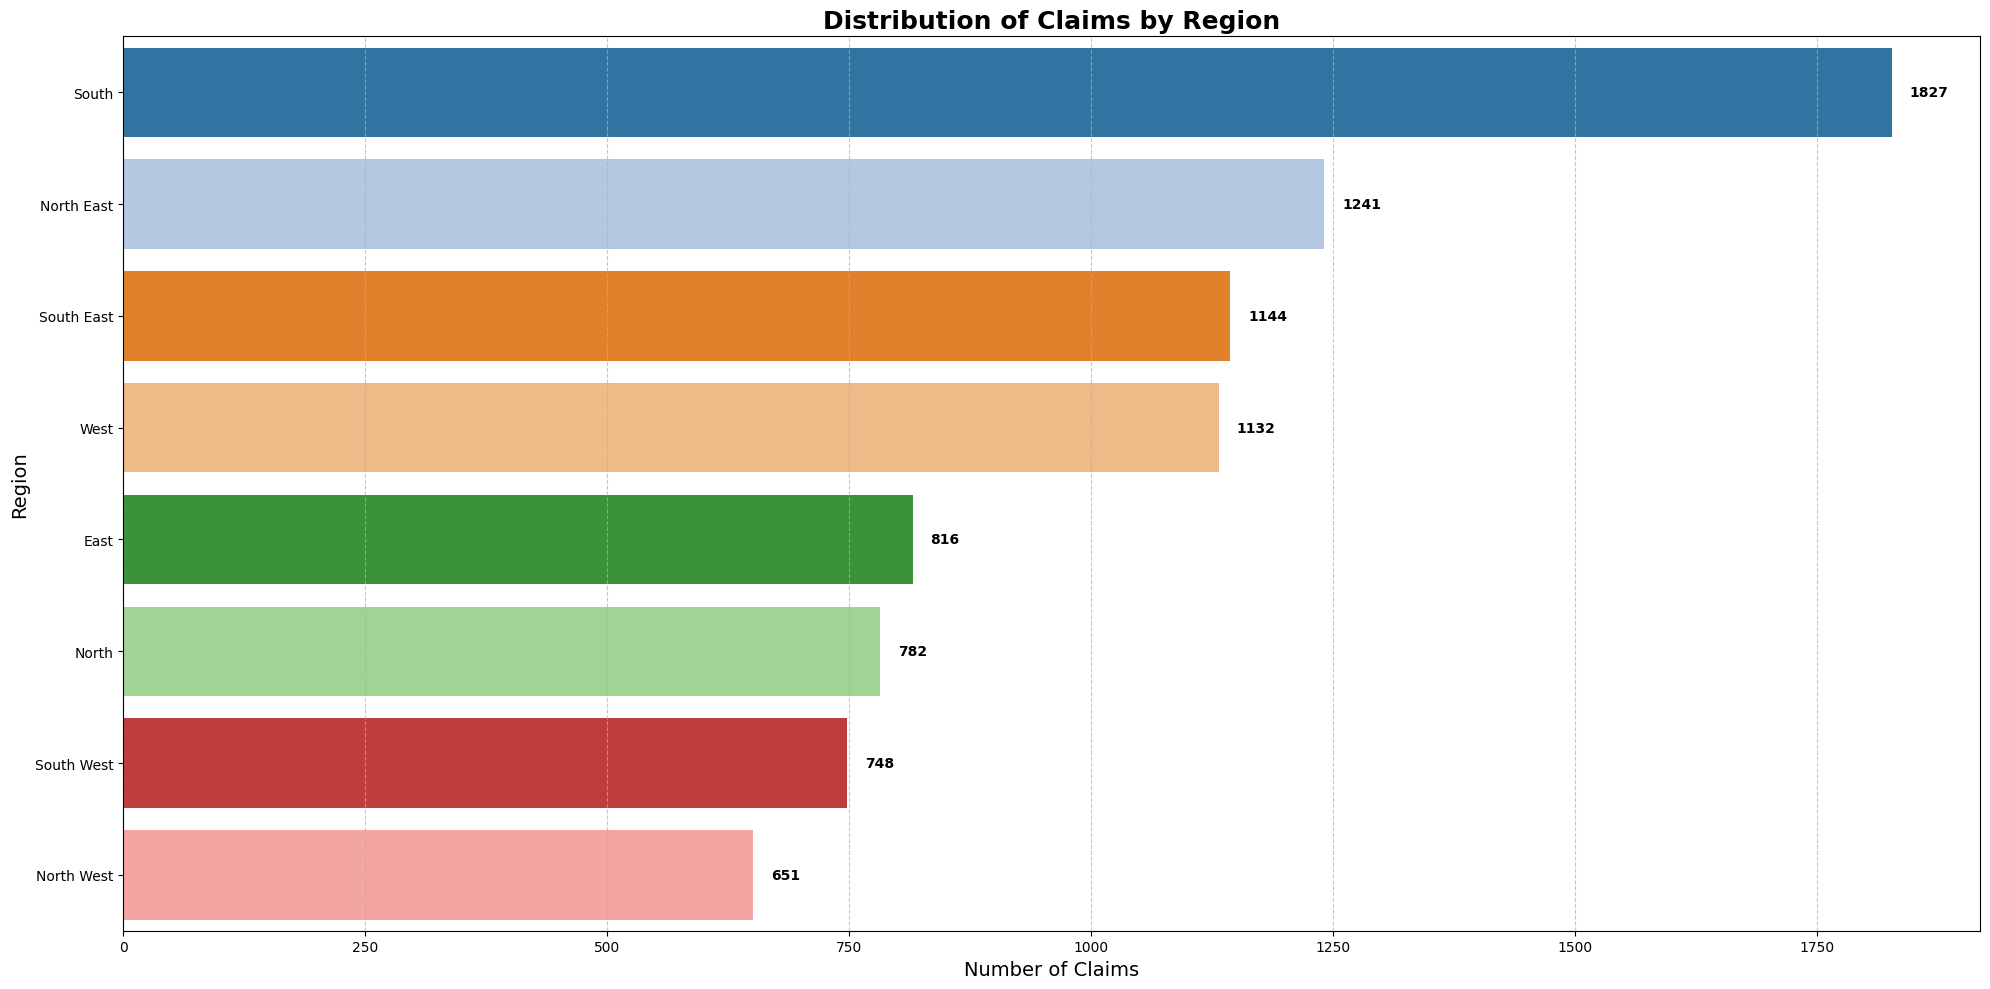

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count region values and sort them
region_counts = df['Region'].value_counts()

# Create figure
plt.figure(figsize=(20, 10))

# Use color palette with as many unique colors as regions
colors = sns.color_palette("tab20", len(region_counts))

# Plot the countplot with sorted regions
ax = sns.barplot(y=region_counts.index, x=region_counts.values, palette=colors)

# Add value labels to bars
for i, v in enumerate(region_counts.values):
    ax.text(v + max(region_counts.values)*0.01, i, str(v), color='black', va='center', fontweight='bold')

# Set title and labels
plt.title('Distribution of Claims by Region', fontsize=18, fontweight='bold')
plt.xlabel('Number of Claims', fontsize=14)
plt.ylabel('Region', fontsize=14)

# Add grid for readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


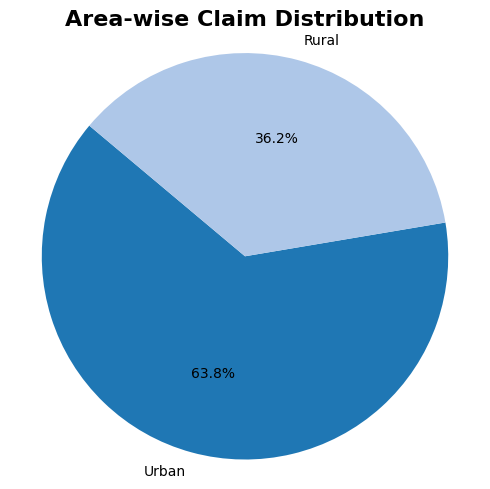

In [10]:
import matplotlib.pyplot as plt

# Count region occurrences
region_counts = df['Area'].value_counts()

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab20'))

# Add title
plt.title('Area-wise Claim Distribution', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.tight_layout()
plt.show()


In [11]:
# State standardization mapping
state_mapping = {
    'UP': 'Uttar Pradesh',
    'MP': 'Madhya Pradesh',
    'HP': 'Himachal Pradesh',
    'J&K': 'Jammu & Kashmir',
    'Telengana': 'Telangana',
    'Maharshtra': 'Maharashtra',  # fix typo
    'Delhi': 'Delhi',  # keep same
    # Add other abbreviations or corrections if needed
}

# Apply the mapping
df['State'] = df['State'].replace(state_mapping)


In [12]:
df['State'].value_counts()

State
Andhra Pradesh      1216
Tamilnadu           1020
Maharashtra          871
Gujarat              748
Kerala               730
Karnataka            708
Delhi                627
Bihar                578
Uttar Pradesh        381
West Bengal          352
Odisha               312
Telangana            188
Goa                  169
Tripura               99
Assam                 79
Jharkhand             74
Rajasthan             53
Himachal Pradesh      53
Madhya Pradesh        43
Haryana               29
Jammu & Kashmir       11
Name: count, dtype: int64

In [13]:
df['City'].value_counts()

City
Chennai        1020
Hyderabad      1002
Kochi           730
Bangalore       708
Mumbai          672
New Delhi       491
Vadodara        397
Kolkata         352
Ahmedabad       351
Lucknow         344
Purnea          323
Bhubaneswar     312
Vijayawada      288
Patna           255
Pune            199
Panaji          169
Delhi           136
Vizag           114
Agartala         99
Guwhati          79
Ranchi           74
Jaipur           53
Shimla           53
Bhopal           43
Meerut           37
Chandigarh       29
Srinagar         11
Name: count, dtype: int64

In [14]:
# Step 1: Correct city names
city_corrections = {
    'Vizag': 'Visakhapatnam',
    'Guwhati': 'Guwahati',
    'Delhi': 'New Delhi'  # optional but clearer
}
df['City'] = df['City'].replace(city_corrections)

# Step 2: City → State mapping
city_to_state = {
    'Chennai': 'Tamilnadu',
    'Hyderabad': 'Telangana',
    'Kochi': 'Kerala',
    'Bangalore': 'Karnataka',
    'Mumbai': 'Maharashtra',
    'New Delhi': 'Delhi',
    'Vadodara': 'Gujarat',
    'Kolkata': 'West Bengal',
    'Ahmedabad': 'Gujarat',
    'Lucknow': 'Uttar Pradesh',
    'Purnea': 'Bihar',
    'Bhubaneswar': 'Odisha',
    'Vijayawada': 'Andhra Pradesh',
    'Patna': 'Bihar',
    'Pune': 'Maharashtra',
    'Panaji': 'Goa',
    'Visakhapatnam': 'Andhra Pradesh',
    'Agartala': 'Tripura',
    'Guwahati': 'Assam',
    'Ranchi': 'Jharkhand',
    'Jaipur': 'Rajasthan',
    'Shimla': 'Himachal Pradesh',
    'Bhopal': 'Madhya Pradesh',
    'Meerut': 'Uttar Pradesh',
    'Chandigarh': 'Haryana',
    'Srinagar': 'Jammu & Kashmir'
}

df['Mapped_State'] = df['City'].map(city_to_state)

# Step 3: State → Region mapping
state_to_region = {
    # South
    'Tamilnadu': 'South',
    'Kerala': 'South',
    'Karnataka': 'South',
    'Telangana': 'South',
    'Andhra Pradesh': 'South',

    # North East
    'Assam': 'North East',
    'Tripura': 'North East',

    # South East
    'Odisha': 'South East',
    'West Bengal': 'South East',

    # West
    'Goa': 'West',
    'Gujarat': 'West',
    'Maharashtra': 'West',

    # East
    'Bihar': 'East',
    'Jharkhand': 'East',

    # North
    'Delhi': 'North',
    'Uttar Pradesh': 'North',
    'Himachal Pradesh': 'North',
    'Jammu & Kashmir': 'North',
    'Haryana': 'North',

    # South West
    'Madhya Pradesh': 'South West',

    # North West
    'Rajasthan': 'North West',
    'Punjab': 'North West',  # Optional if included
    'Chandigarh': 'North West'
}

# Step 4: Map Region based on Mapped_State
df['Region'] = df['Mapped_State'].map(state_to_region)


In [15]:
# Check rows where mapping failed
missing_city_state = df[df['Mapped_State'].isnull()]
missing_state_region = df[df['Region'].isnull()]


In [16]:
print(missing_city_state)
print(missing_state_region)

Empty DataFrame
Columns: [Customer_id, Region, State, Area, City, Consumer_profile, Product_category, Product_type, AC_1001_Issue, AC_1002_Issue, AC_1003_Issue, TV_2001_Issue, TV_2002_Issue, TV_2003_Issue, Claim_Value, Service_Centre, Product_Age, Purchased_from, Call_details, Purpose, Fraud, Mapped_State]
Index: []

[0 rows x 22 columns]
Empty DataFrame
Columns: [Customer_id, Region, State, Area, City, Consumer_profile, Product_category, Product_type, AC_1001_Issue, AC_1002_Issue, AC_1003_Issue, TV_2001_Issue, TV_2002_Issue, TV_2003_Issue, Claim_Value, Service_Centre, Product_Age, Purchased_from, Call_details, Purpose, Fraud, Mapped_State]
Index: []

[0 rows x 22 columns]


/var/folders/x6/927q59w17dg3mzfmhv4v0g6r0000gn/T/ipykernel_2412/388537064.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=region_counts.index, x=region_counts.values, palette=colors)


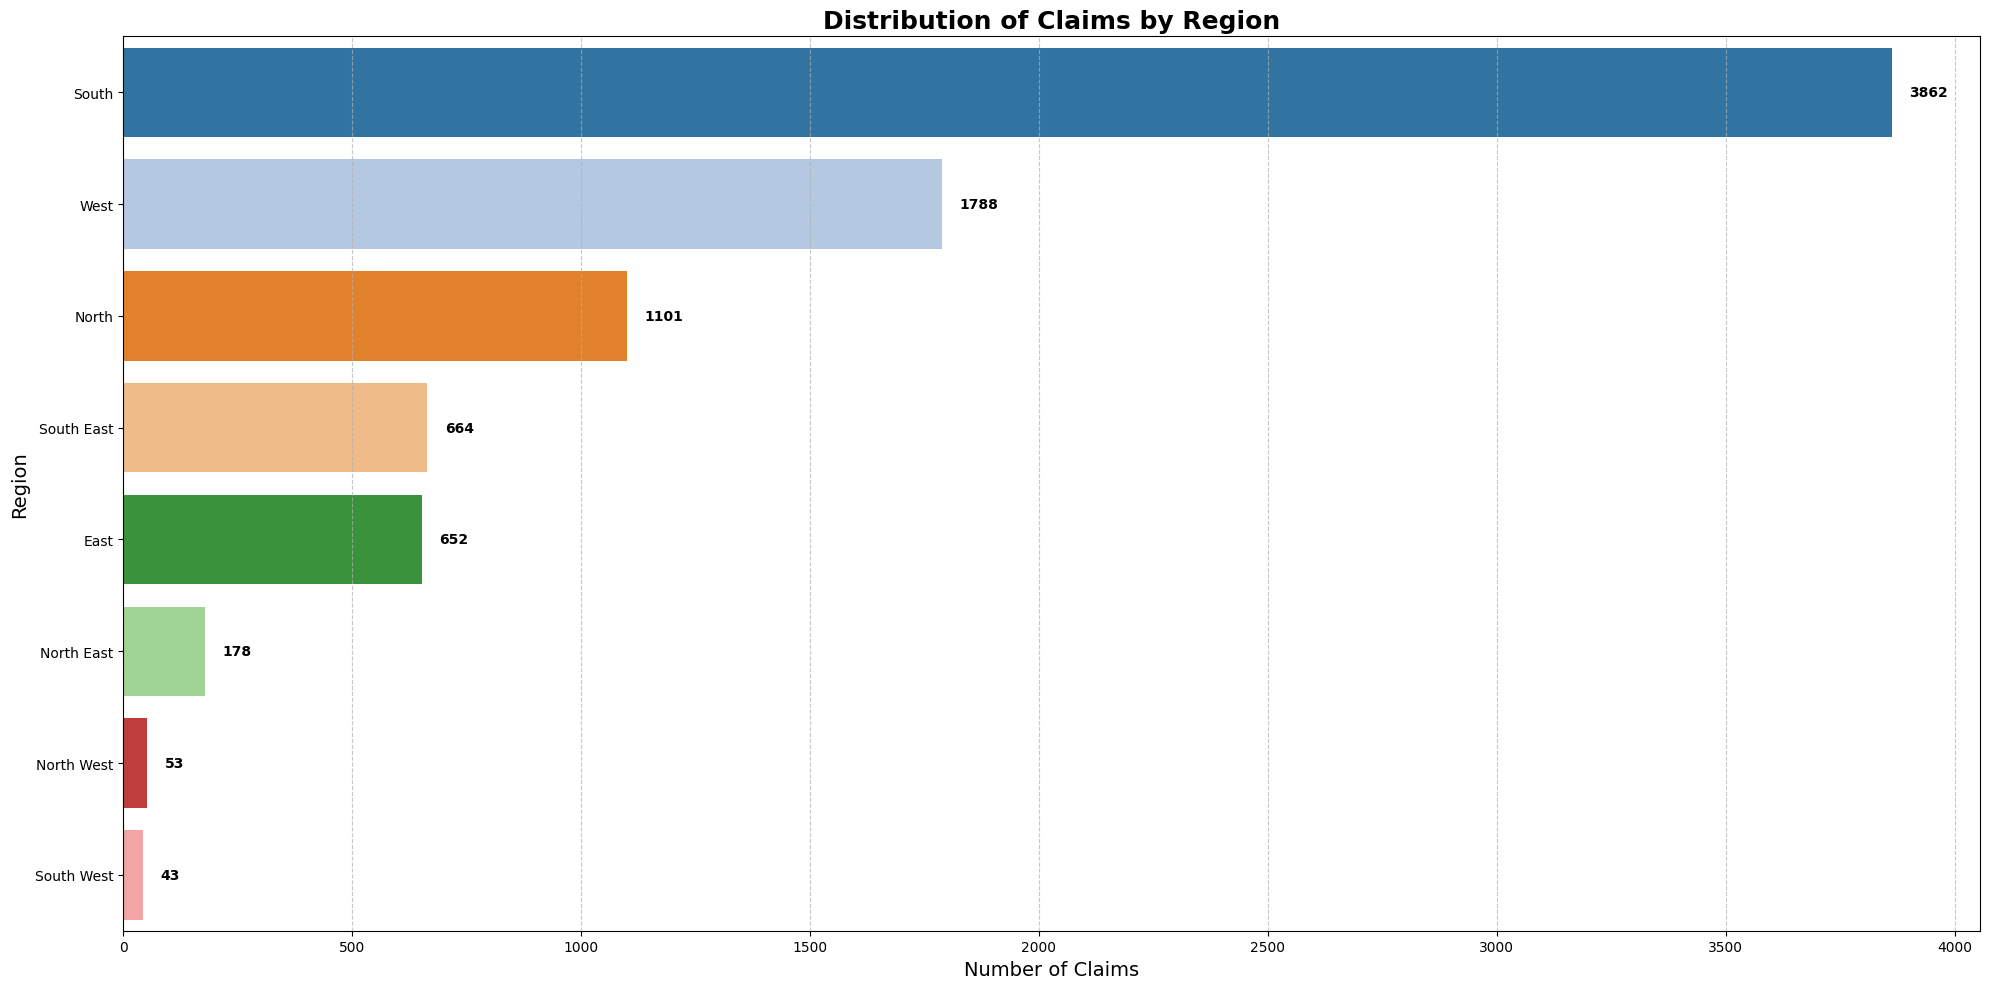

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count region values and sort them
region_counts = df['Region'].value_counts()

# Create figure
plt.figure(figsize=(20, 10))

# Use color palette with as many unique colors as regions
colors = sns.color_palette("tab20", len(region_counts))

# Plot the countplot with sorted regions
ax = sns.barplot(y=region_counts.index, x=region_counts.values, palette=colors)

# Add value labels to bars
for i, v in enumerate(region_counts.values):
    ax.text(v + max(region_counts.values)*0.01, i, str(v), color='black', va='center', fontweight='bold')

# Set title and labels
plt.title('Distribution of Claims by Region', fontsize=18, fontweight='bold')
plt.xlabel('Number of Claims', fontsize=14)
plt.ylabel('Region', fontsize=14)

# Add grid for readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [18]:
import matplotlib.pyplot as plt

# List of issue columns
issue_columns = [
    'AC_1001_Issue', 'AC_1002_Issue', 'AC_1003_Issue',
    'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue'
]

for i in issue_columns :
    print(df[i].value_counts())


AC_1001_Issue
0    6647
1    1145
2     549
Name: count, dtype: int64
AC_1002_Issue
0    6395
1    1385
2     561
Name: count, dtype: int64
AC_1003_Issue
0    7159
1     779
2     403
Name: count, dtype: int64
TV_2001_Issue
0    5871
1    1985
2     485
Name: count, dtype: int64
TV_2002_Issue
0    5413
1    2244
2     684
Name: count, dtype: int64
TV_2003_Issue
0    6245
1    1721
2     375
Name: count, dtype: int64


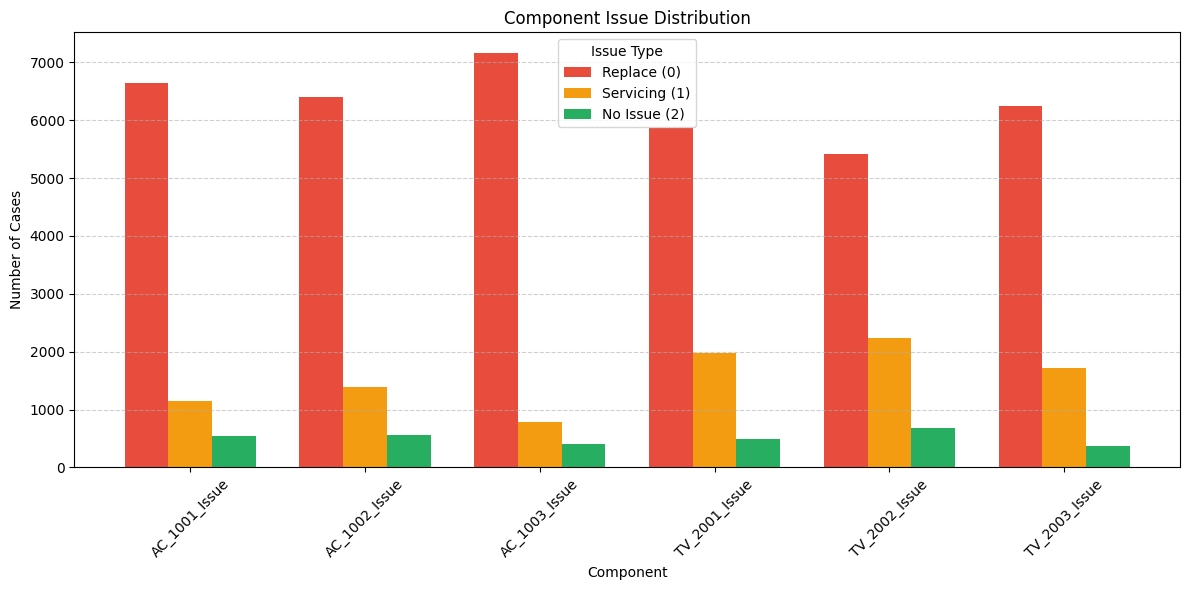

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Columns to visualize
issue_columns = [
    'AC_1001_Issue', 'AC_1002_Issue', 'AC_1003_Issue',
    'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue'
]

# Count each issue type for every component
issue_counts = df[issue_columns].apply(lambda col: col.value_counts()).T.fillna(0)
issue_counts = issue_counts[[0, 1, 2]]  # Reorder columns: 0, 1, 2

# Bar chart setup
labels = issue_counts.index
x = np.arange(len(labels))
width = 0.25

# Plot bars
fig, ax = plt.subplots(figsize=(12, 6))
bars0 = ax.bar(x - width, issue_counts[0], width, label='Replace (0)', color='#e74c3c')
bars1 = ax.bar(x, issue_counts[1], width, label='Servicing (1)', color='#f39c12')
bars2 = ax.bar(x + width, issue_counts[2], width, label='No Issue (2)', color='#27ae60')

# Add labels and grid
ax.set_xlabel('Component')
ax.set_ylabel('Number of Cases')
ax.set_title('Component Issue Distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(title='Issue Type')
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Show chart
plt.tight_layout()
plt.show()


In [20]:
df['Service_Centre'].value_counts()

Service_Centre
15    1954
12    1726
13    1627
10    1386
14    1239
11     378
16      31
Name: count, dtype: int64

In [21]:
df['Purpose'].value_counts()

Purpose
Claim        3887
Complaint    3527
Other         887
claim          40
Name: count, dtype: int64

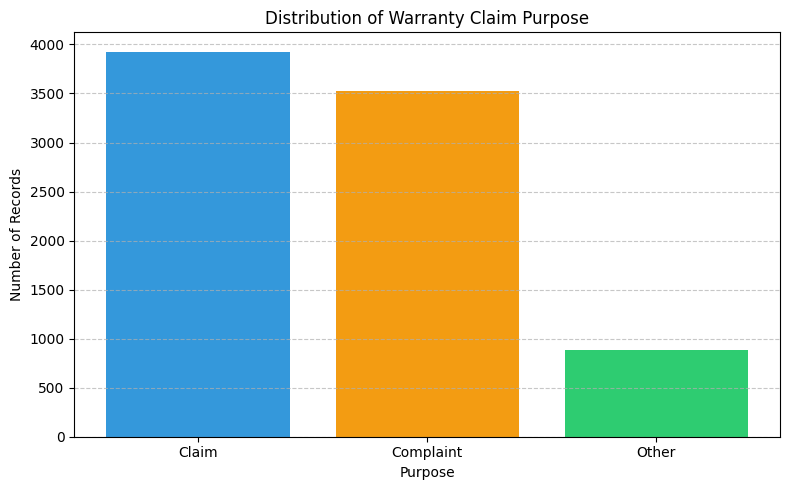

In [22]:
# Normalize purpose column
df['Purpose'] = df['Purpose'].str.capitalize()
import matplotlib.pyplot as plt

# Count the purpose values
purpose_counts = df['Purpose'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(purpose_counts.index, purpose_counts.values, color=['#3498db', '#f39c12', '#2ecc71'])
plt.xlabel('Purpose')
plt.ylabel('Number of Records')
plt.title('Distribution of Warranty Claim Purpose')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


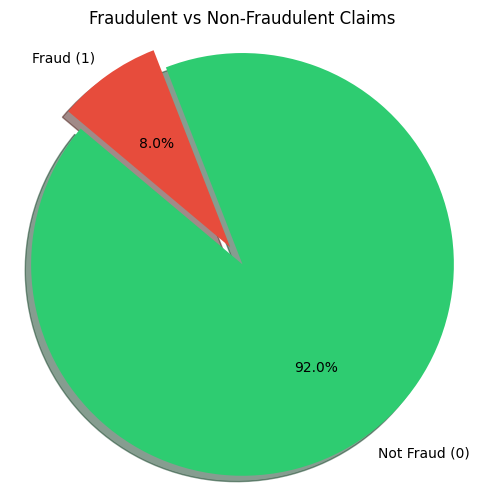

In [23]:
import matplotlib.pyplot as plt

# Fraud value counts
fraud_counts = df['Fraud'].value_counts()
labels = ['Not Fraud (0)', 'Fraud (1)']
colors = ['#2ecc71', '#e74c3c']  # green for normal, red for fraud

# Plot
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0, 0.1), shadow=True)
plt.title('Fraudulent vs Non-Fraudulent Claims')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_id       8341 non-null   int64  
 1   Region            8341 non-null   object 
 2   State             8341 non-null   object 
 3   Area              8341 non-null   object 
 4   City              8341 non-null   object 
 5   Consumer_profile  8341 non-null   object 
 6   Product_category  8341 non-null   object 
 7   Product_type      8341 non-null   object 
 8   AC_1001_Issue     8341 non-null   int64  
 9   AC_1002_Issue     8341 non-null   int64  
 10  AC_1003_Issue     8341 non-null   int64  
 11  TV_2001_Issue     8341 non-null   int64  
 12  TV_2002_Issue     8341 non-null   int64  
 13  TV_2003_Issue     8341 non-null   int64  
 14  Claim_Value       8341 non-null   float64
 15  Service_Centre    8341 non-null   int64  
 16  Product_Age       8341 non-null   int64  


In [25]:
# Numerical features
num_features = [
    'AC_1001_Issue', 'AC_1002_Issue', 'AC_1003_Issue',
    'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue',
    'Claim_Value', 'Service_Centre', 'Product_Age', 'Call_details'
]

# Categorical features (to be one-hot encoded or label encoded)
cat_features = [
    'Region', 'State', 'Area', 'City',
    'Consumer_profile', 'Product_category', 'Product_type',
    'Purchased_from', 'Purpose'
]


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Target and Features
X = df[num_features + cat_features]
y = df['Fraud']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(),
}

# Train and evaluate
for name, model in models.items():
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)

    print(f"\n{'='*30}\n{name} Accuracy: {score:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



Random Forest Accuracy: 0.9814
Confusion Matrix:
[[1517   19]
 [  12  121]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1536
           1       0.86      0.91      0.89       133

    accuracy                           0.98      1669
   macro avg       0.93      0.95      0.94      1669
weighted avg       0.98      0.98      0.98      1669


Logistic Regression Accuracy: 0.9341
Confusion Matrix:
[[1521   15]
 [  95   38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1536
           1       0.72      0.29      0.41       133

    accuracy                           0.93      1669
   macro avg       0.83      0.64      0.69      1669
weighted avg       0.92      0.93      0.92      1669


Gradient Boosting Accuracy: 0.9754
Confusion Matrix:
[[1529    7]
 [  34   99]]

Classification Report:
              precision    recall

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Numerical features
num_features = [
    'AC_1001_Issue', 'AC_1002_Issue', 'AC_1003_Issue',
    'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue',
    'Claim_Value', 'Service_Centre', 'Product_Age', 'Call_details'
]

# Categorical features
cat_features = [
    'Region', 'State', 'Area', 'City',
    'Consumer_profile', 'Product_category', 'Product_type',
    'Purchased_from', 'Purpose'
]

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier()
}




Random Forest
✅ Accuracy: 0.9814
📉 ROC AUC Score: 0.9968
🧪 CV Score (mean ± std): 0.9753 ± 0.0023

📊 Confusion Matrix:


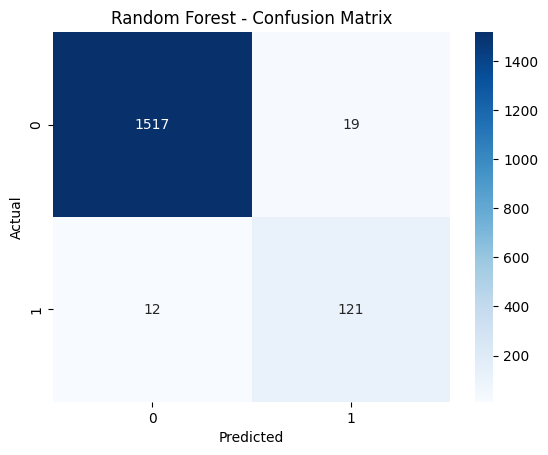

🔍 True Positive Rate (Recall): 0.9098
🚨 False Positive Rate: 0.0124

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1536
           1       0.86      0.91      0.89       133

    accuracy                           0.98      1669
   macro avg       0.93      0.95      0.94      1669
weighted avg       0.98      0.98      0.98      1669



/var/folders/x6/927q59w17dg3mzfmhv4v0g6r0000gn/T/ipykernel_2412/541589770.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_idx], y=all_feature_names[sorted_idx], palette='viridis')


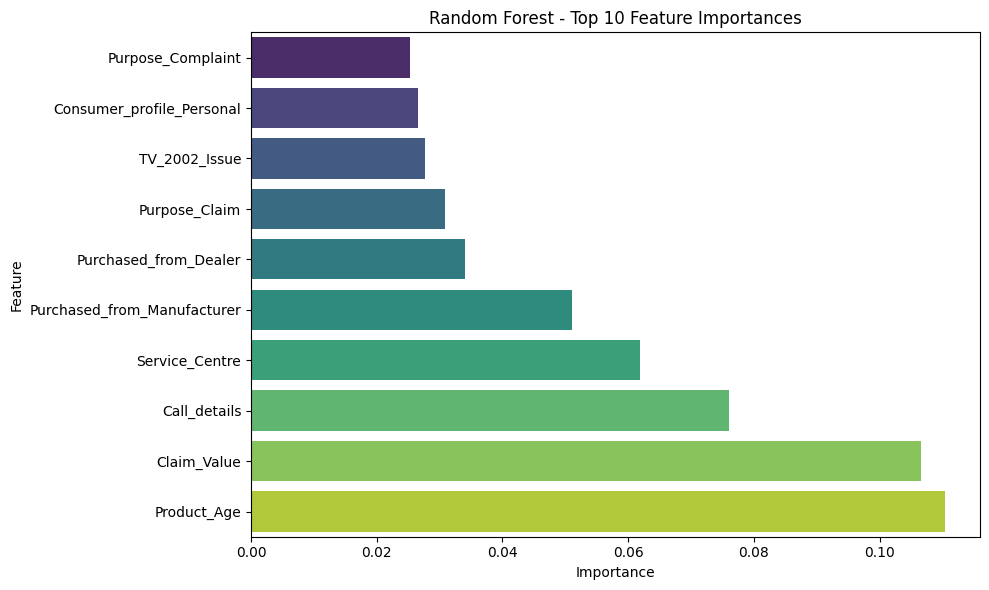


Logistic Regression
✅ Accuracy: 0.9341
📉 ROC AUC Score: 0.9278
🧪 CV Score (mean ± std): 0.9341 ± 0.0061

📊 Confusion Matrix:


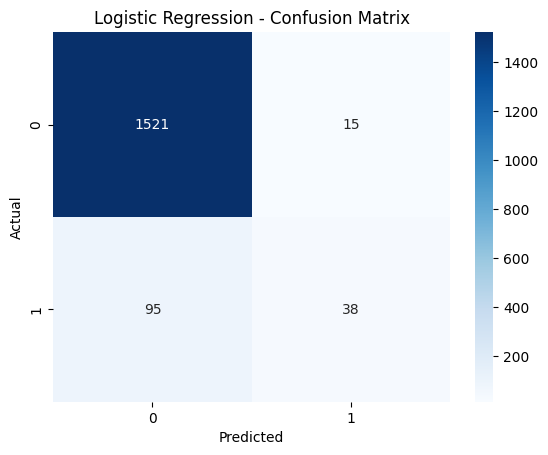

🔍 True Positive Rate (Recall): 0.2857
🚨 False Positive Rate: 0.0098

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1536
           1       0.72      0.29      0.41       133

    accuracy                           0.93      1669
   macro avg       0.83      0.64      0.69      1669
weighted avg       0.92      0.93      0.92      1669


Gradient Boosting
✅ Accuracy: 0.9754
📉 ROC AUC Score: 0.9894
🧪 CV Score (mean ± std): 0.9669 ± 0.0036

📊 Confusion Matrix:


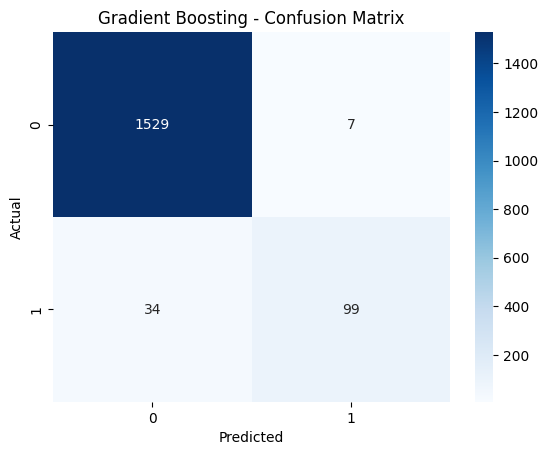

🔍 True Positive Rate (Recall): 0.7444
🚨 False Positive Rate: 0.0046

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1536
           1       0.93      0.74      0.83       133

    accuracy                           0.98      1669
   macro avg       0.96      0.87      0.91      1669
weighted avg       0.97      0.98      0.97      1669



/var/folders/x6/927q59w17dg3mzfmhv4v0g6r0000gn/T/ipykernel_2412/541589770.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_idx], y=all_feature_names[sorted_idx], palette='viridis')


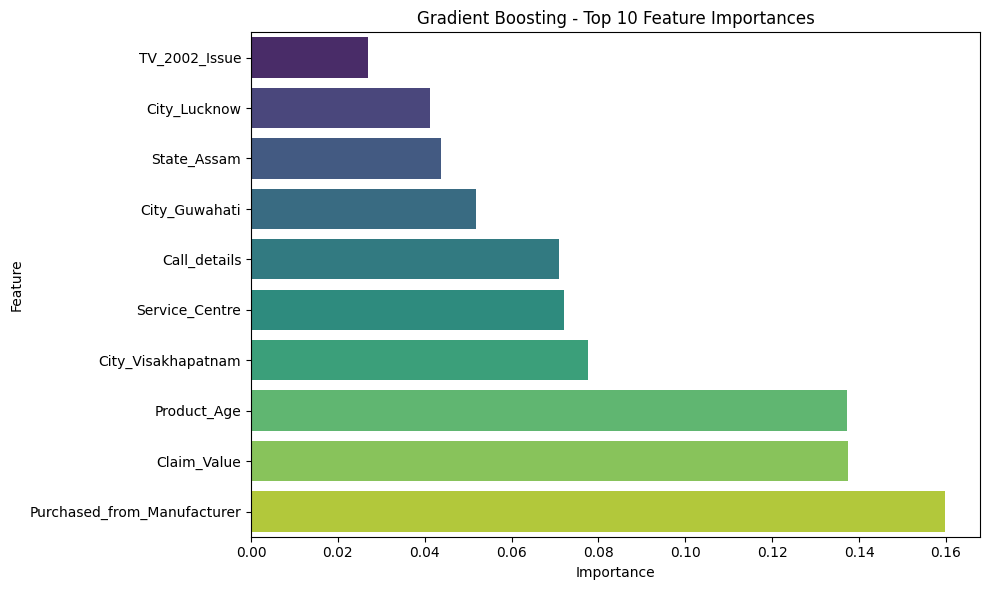

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Model evaluation
for name, model in models.items():
    print(f"\n{'='*50}\n{name}")

    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    acc = clf.score(X_test, y_test)
    roc_auc = roc_auc_score(y_test, y_proba)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

    print(f"✅ Accuracy: {acc:.4f}")
    print(f"📉 ROC AUC Score: {roc_auc:.4f}")
    print(f"🧪 CV Score (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # Confusion Matrix
    print("\n📊 Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Calculate TPR and FPR
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall / Sensitivity
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate

    print(f"🔍 True Positive Rate (Recall): {tpr:.4f}")
    print(f"🚨 False Positive Rate: {fpr:.4f}")

    # Classification Report
    print("\n📋 Classification Report:")
    print(classification_report(y_test, y_pred))

    # Feature Importance for Tree-Based Models
    if name in ['Random Forest', 'Gradient Boosting']:
        cat_ohe = clf.named_steps['preprocessor'].named_transformers_['cat']
        cat_feature_names = cat_ohe.get_feature_names_out(cat_features)
        all_feature_names = np.concatenate([num_features, cat_feature_names])
        importances = clf.named_steps['classifier'].feature_importances_
        sorted_idx = np.argsort(importances)[-10:]

        plt.figure(figsize=(10, 6))
        sns.barplot(x=importances[sorted_idx], y=all_feature_names[sorted_idx], palette='viridis')
        plt.title(f"{name} - Top 10 Feature Importances")
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()


In [31]:
# Initialize storage for metrics
model_names = []
accuracies = []
roc_aucs = []
tprs = []
fprs = []

# Loop through models and collect metrics
for name, model in models.items():
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    acc = clf.score(X_test, y_test)
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

    # Store metrics
    model_names.append(name)
    accuracies.append(acc)
    roc_aucs.append(roc_auc)
    tprs.append(tpr)
    fprs.append(fpr)


/var/folders/x6/927q59w17dg3mzfmhv4v0g6r0000gn/T/ipykernel_2412/1661138189.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/Users/truptijagdale/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


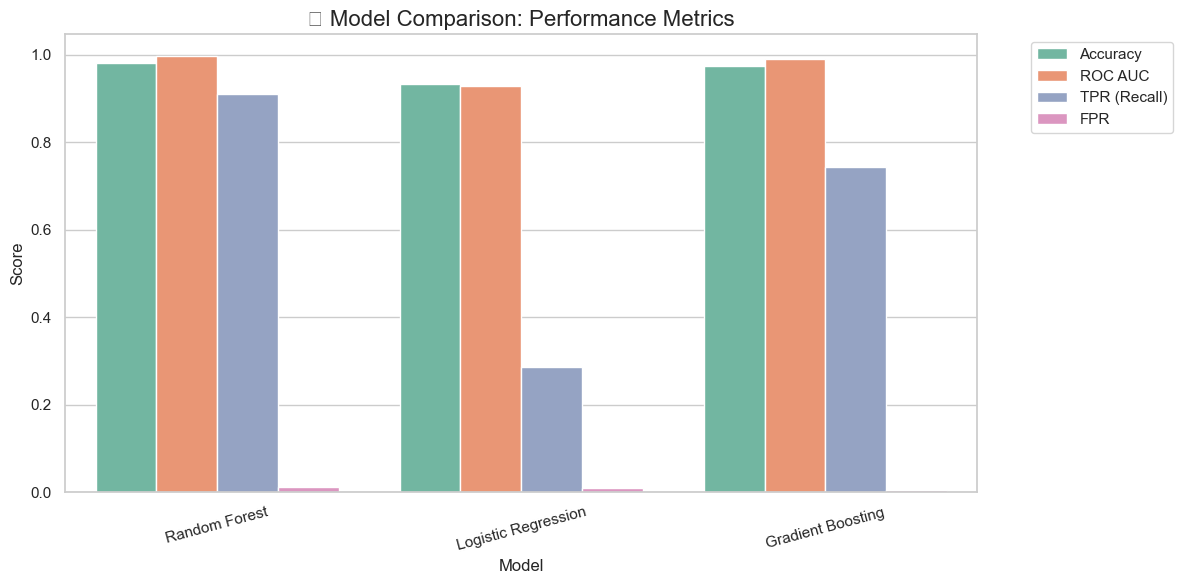

In [32]:
import pandas as pd

# Create DataFrame for visualization
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'ROC AUC': roc_aucs,
    'TPR (Recall)': tprs,
    'FPR': fprs
})

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Melt DataFrame for Seaborn
melted_df = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Barplot
sns.barplot(data=melted_df, x='Model', y='Score', hue='Metric', palette='Set2')
plt.title('📊 Model Comparison: Performance Metrics', fontsize=16)
plt.ylabel('Score')
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
